<a href="https://colab.research.google.com/github/ys23-lys/ESAA/blob/main/YB_1114_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%9A%8C%EA%B7%802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [50]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1) 데이터 불러오기 및 데이터 선택

In [52]:
# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/Colab/ESAA/abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [53]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [54]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [55]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [56]:
#릿지모델 생성 및 훈련
ridge_reg=Ridge(alpha=0.3)
ridge_reg.fit(X_train,y_train)

#예측값 구하기
y_pred=ridge_reg.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
pred_age=y_pred+1.5

#MSE와 RMSE구하기
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
print('MSE:',MSE,'RMSE:',RMSE)

MSE: 4.772148639987027 RMSE: 2.1845248087369087


3-3) 릿지 모델에서 회귀 계수 값을 구해 알 수 있는 점을 작성하시오. (각 컬럼의 정보는 data.colums 참고)

In [57]:
data.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'M', 'F', 'I'],
      dtype='object')

<Axes: ylabel='None'>

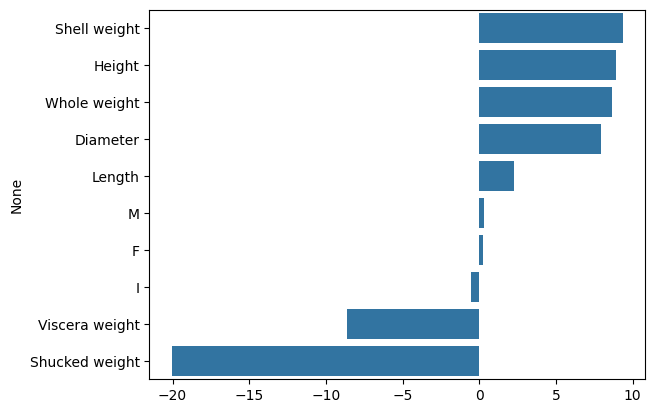

In [58]:
import seaborn as sns
import pandas as pd

coef=pd.Series(ridge_reg.coef_,index=data.columns)
coef_sort=coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values,y=coef_sort.index)

3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [59]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [60]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
from sklearn.model_selection import cross_val_score
rmse_list=[]
for alpha in alphas:
  ridge=Ridge(alpha=alpha)

  #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
  neg_mse_scores=cross_val_score(ridge,X,y,scoring='neg_mean_squared_error',cv=5)
  rmse=np.sqrt(-1*neg_mse_scores)
  avg_rmse=np.mean(rmse)
  rmse_list.append((alpha,avg_rmse))
  print('alpha:',{alpha},'average_RMSE:',{avg_rmse})

alpha: {0} average_RMSE: {np.float64(2.244617415600131)}
alpha: {0.1} average_RMSE: {np.float64(2.2371368259830495)}
alpha: {1} average_RMSE: {np.float64(2.230321200422364)}
alpha: {10} average_RMSE: {np.float64(2.3372805091310007)}
alpha: {100} average_RMSE: {np.float64(2.621188059927813)}


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [61]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [62]:
from sklearn.metrics import mean_squared_error

#모델 생성 및 훈련
xgb_reg=XGBRegressor(n_estimators=1000,learning_rate=0.05,colsample_bytree=0.5,subsample=0.8,random_state=42)
xgb_reg.fit(X_train,y_train)

#예측값 구하기
y_pred_xgb=xgb_reg.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
pred_age_xgb=y_pred_xgb + 1.5

#MSE와 RMSE 구하기
mse_xgb=mean_squared_error(y_test+1.5,pred_age_xgb)
rmse_xgb=np.sqrt(mse_xgb)
print('MSE:',mse_xgb,'RMSE:',rmse_xgb)

MSE: 5.156185842181899 RMSE: 2.2707236384425777


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

<Axes: xlabel='importance', ylabel='feature'>

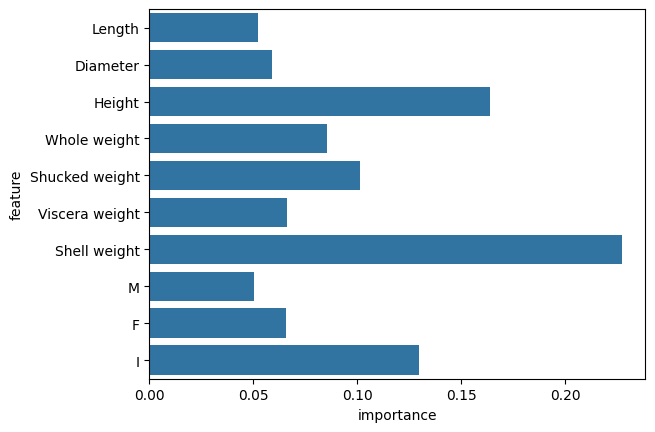

In [66]:
import seaborn as sns
%matplotlib inline

feature_importances=xgb_reg.feature_importances_
feature_names=data.columns
importance_df=pd.DataFrame({'feature':feature_names,'importance':feature_importances})
importance_df.sort_values('importance',ascending=False)
sns.barplot(x='importance',y='feature',data=importance_df)

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [67]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [68]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [69]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

x_train.shape
y_train.shape

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [70]:
lr_clf=LogisticRegression()
lr_clf.fit(x_train,y_train)

LogisticRegression()

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [71]:
# 기울기
print("기울기",lr_clf.coef_)

기울기 [[-1.99751338e-01  3.65451144e-01  1.49472353e-01 -1.88027194e-01
  -2.28494592e-02  1.95456785e-01  4.66701970e-01 -1.66796877e-02
   8.23898405e-02  6.75013134e-02 -1.92622072e-02  2.94916201e-01
   7.42522347e-03]
 [ 5.96476523e-01 -7.88673910e-01 -1.26181652e-01  2.12254429e-01
  -1.13504086e-02  3.15786394e-01  3.55148523e-01  3.34675938e-02
   2.79036084e-01 -1.17202662e+00  2.61166065e-01  4.64732238e-01
  -8.33633769e-03]
 [-3.96725185e-01  4.23222765e-01 -2.32907005e-02 -2.42272356e-02
   3.41998678e-02 -5.11243179e-01 -8.21850494e-01 -1.67879061e-02
  -3.61425924e-01  1.10452531e+00 -2.41903857e-01 -7.59648438e-01
   9.11114220e-04]]


In [72]:
# 절편
print("절편",lr_clf.intercept_)

절편 [-0.04177842  0.09551058 -0.05373216]


3-3) 모델의 정확도를 구하세요.

In [73]:
#모델의 예측값 구하기
y_pred_lr=lr_clf.predict(x_test)

#모델의 정확도 구하기
accuracy=metrics.accuracy_score(y_test,y_pred_lr)
print('accuracy:',accuracy)

accuracy: 0.9629629629629629
